# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sb
import warnings
import sqlite3
from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


# Loading the dataset

In [2]:
import mysql.connector as connection

conn=connection.connect(host="localhost",user="root",password="Mahir@863",database="vendor_management")

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,Volume,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,8112,MOET HENNESSY USA INC,115,Belvedere Vodka,27.99,21.37,1000,94435.0,2.643236e+06,1.525595e+06,99156.75,4.240162e+08,9.387738e+09,4.791213e+07,-9.385095e+09,-3.550609e+05,0.000223,0.000282
1,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1000,264385.0,8.660021e+06,3.221139e+06,277604.25,2.544475e+09,3.142427e+10,1.591974e+08,-3.141561e+10,-3.627659e+05,0.000104,0.000276
2,1128,BROWN-FORMAN CORP,171,Gentleman Jack,49.99,36.76,1750,61215.0,3.140163e+06,2.429702e+06,112550.90,8.652649e+08,1.163531e+10,5.899744e+07,-1.163217e+10,-3.704321e+05,0.000071,0.000270
3,7245,PROXIMO SPIRITS INC.,175,1800 Anejo Tequila,36.99,26.80,750,8415.0,3.533458e+05,2.563489e+05,6636.30,7.570666e+07,8.422713e+08,4.328421e+06,-8.419180e+08,-2.382702e+05,0.000111,0.000420
4,4425,MARTIGNETTI COMPANIES,211,Cold River Gin,24.99,19.83,750,27224.0,7.886498e+05,6.870862e+05,21483.18,7.657192e+08,8.079890e+09,4.202948e+07,-8.079101e+09,-1.024422e+06,0.000036,0.000098


## Exploratory Data Analysis
* Previously, we examined the various tables in theydatabase to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
<br><br>
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,identify anomalies, and ensure data quality before proceeding with further analysis.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8370.0,9.992245e+03,1.714388e+04,2.000000e+00,3.924000e+03,7.153000e+03,9.552000e+03,1.733570e+05
Brand,8370.0,1.759490e+04,1.304715e+04,5.800000e+01,5.356500e+03,1.746700e+04,2.447075e+04,9.009000e+04
ActualPrice,8370.0,2.893817e+01,8.276422e+01,4.900000e-01,1.099000e+01,1.599000e+01,2.799000e+01,4.999990e+03
PurchasePrice,8370.0,1.940561e+01,6.062138e+01,3.800000e-01,6.800000e+00,1.034000e+01,1.882000e+01,3.787870e+03
Volume,8370.0,8.506593e+02,6.095174e+02,5.000000e+01,7.500000e+02,7.500000e+02,7.500000e+02,2.000000e+04
TotalSalesQuantity,8370.0,4.022998e+04,1.314744e+05,1.000000e+01,7.700000e+02,5.170000e+03,2.792625e+04,3.821015e+06
TotalSalesDollars,8370.0,5.421692e+05,1.867868e+06,5.390000e+01,1.732005e+04,9.807444e+04,4.357826e+05,5.681111e+07
TotalSalesPrice,8370.0,2.628030e+05,5.827531e+05,2.695000e+01,7.788075e+03,5.338382e+04,2.603726e+05,1.006285e+07
TotalExciseTax,8370.0,2.241455e+04,1.267406e+05,1.100000e+00,1.247150e+02,9.482000e+02,6.742037e+03,4.696279e+06
TotalPurchaseQuantity,8370.0,5.442557e+08,1.774203e+09,2.400000e+01,2.909584e+06,3.432102e+07,2.762780e+08,2.726072e+10


In [4]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,Volume,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,8112,MOET HENNESSY USA INC,115,Belvedere Vodka,27.99,21.37,1000,94435.0,2.643236e+06,1.525595e+06,99156.75,4.240162e+08,9.387738e+09,4.791213e+07,-9.385095e+09,-3.550609e+05,0.000223,0.000282
1,480,BACARDI USA INC,126,Grey Goose Vodka,32.99,20.14,1000,264385.0,8.660021e+06,3.221139e+06,277604.25,2.544475e+09,3.142427e+10,1.591974e+08,-3.141561e+10,-3.627659e+05,0.000104,0.000276
2,1128,BROWN-FORMAN CORP,171,Gentleman Jack,49.99,36.76,1750,61215.0,3.140163e+06,2.429702e+06,112550.90,8.652649e+08,1.163531e+10,5.899744e+07,-1.163217e+10,-3.704321e+05,0.000071,0.000270
3,7245,PROXIMO SPIRITS INC.,175,1800 Anejo Tequila,36.99,26.80,750,8415.0,3.533458e+05,2.563489e+05,6636.30,7.570666e+07,8.422713e+08,4.328421e+06,-8.419180e+08,-2.382702e+05,0.000111,0.000420
4,4425,MARTIGNETTI COMPANIES,211,Cold River Gin,24.99,19.83,750,27224.0,7.886498e+05,6.870862e+05,21483.18,7.657192e+08,8.079890e+09,4.202948e+07,-8.079101e+09,-1.024422e+06,0.000036,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,3252,E & J GALLO WINERY,18083,Madria Sangria Moscato,8.99,6.16,1500,330.0,2.966700e+03,4.944500e+02,74.25,1.858260e+06,1.228961e+07,6.196691e+04,-1.228664e+07,-4.141518e+05,0.000178,0.000241
8366,480,BACARDI USA INC,974,Bacardi O Orange Rum,15.49,12.29,1000,110.0,1.703900e+03,8.519500e+02,115.50,1.427075e+06,1.762438e+07,8.928627e+04,-1.762267e+07,-1.034255e+06,0.000077,0.000097
8367,9165,ULTRA BEVERAGE COMPANY LLP,23265,Frescobaldi Monte Chianti Rs,39.99,26.84,750,1760.0,7.038240e+04,1.539615e+04,198.00,7.542689e+06,9.247430e+07,4.763829e+05,-9.240392e+07,-1.312884e+05,0.000233,0.000761
8368,17035,PERNOD RICARD USA,23036,Jacobs Creek Two Lands Pnt G,8.99,6.62,750,275.0,2.472250e+03,1.977800e+03,30.25,6.590232e+06,9.649637e+07,4.951209e+05,-9.649389e+07,-3.903080e+06,0.000042,0.000026


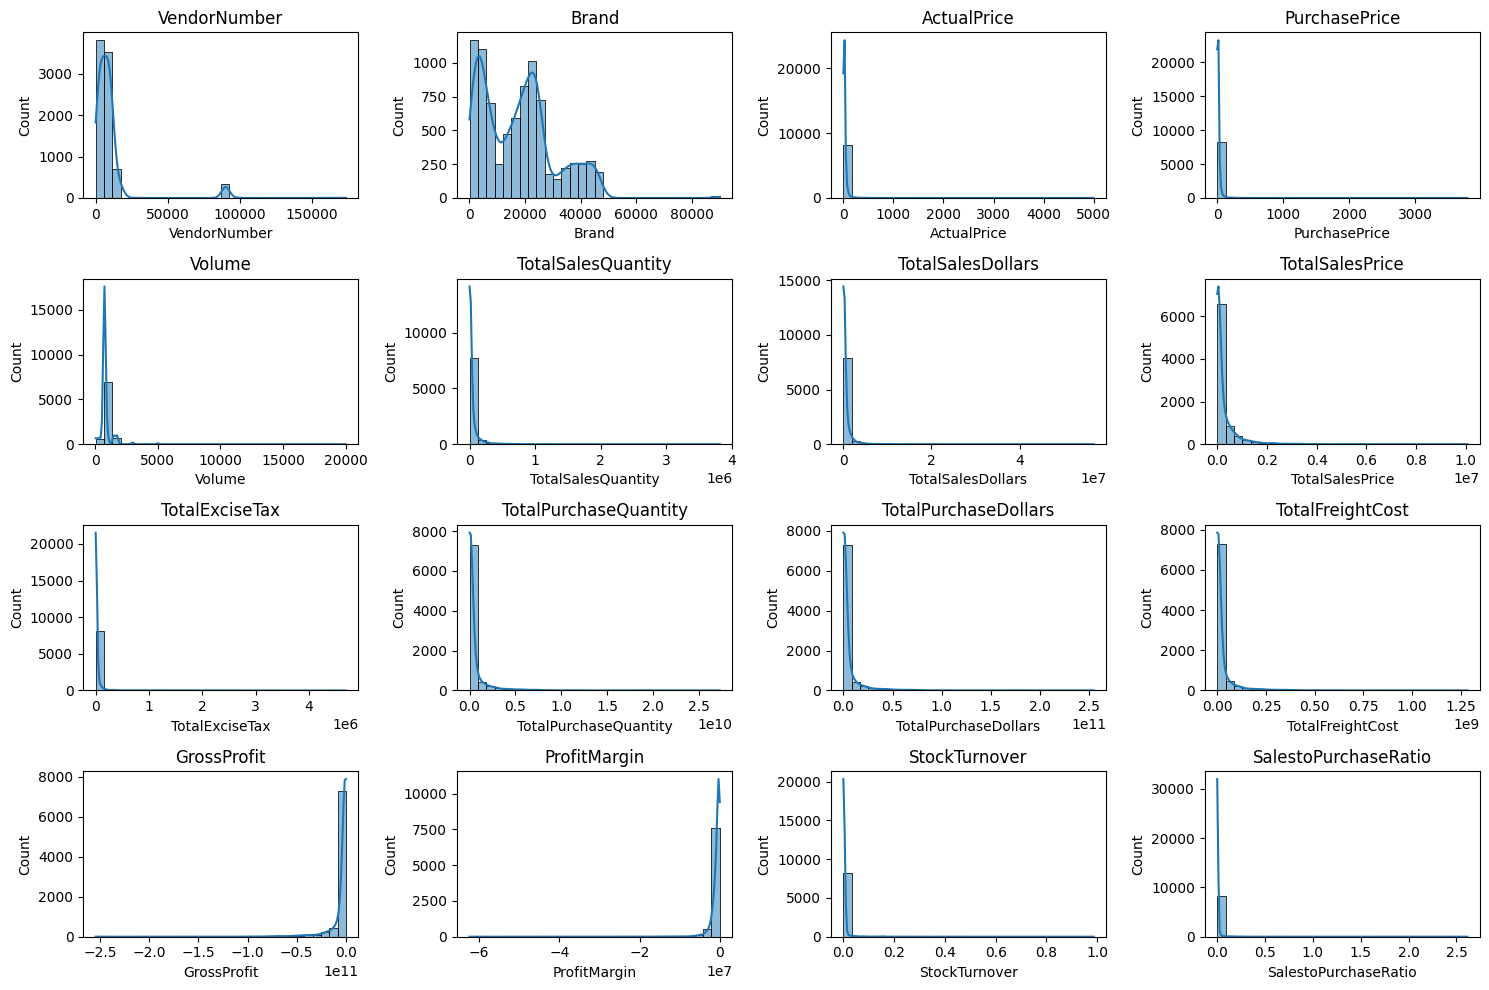

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed 
    sb.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

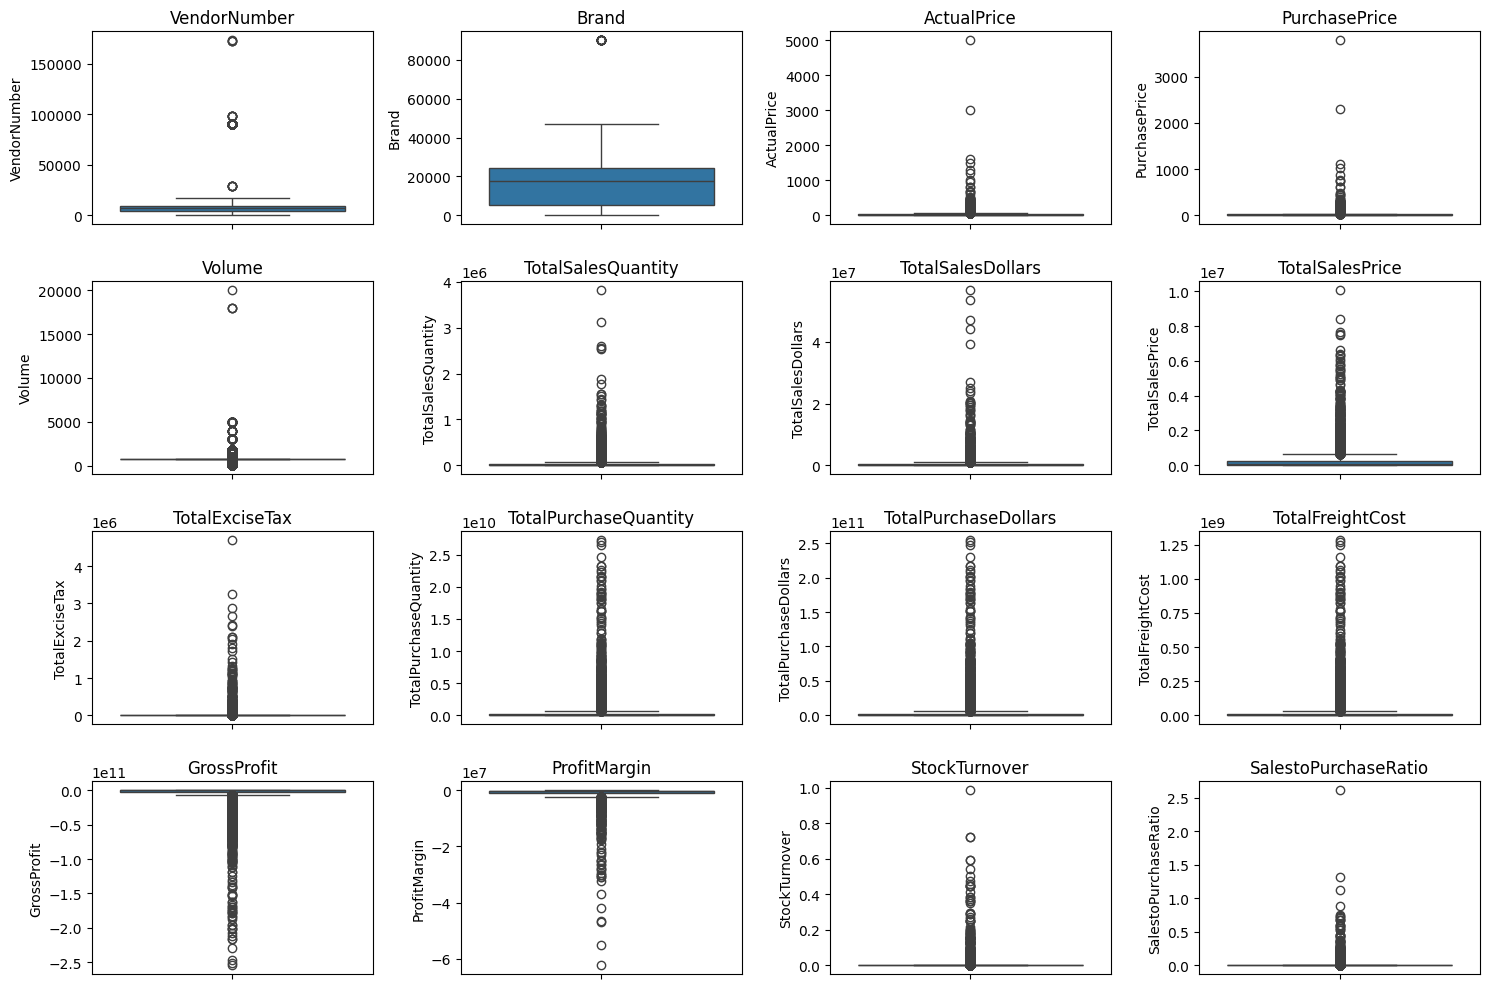

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed 
    sb.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

<b>Negative & Zero Values:</b>
<br>
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
<br></br>
<b>Outliers Indicated by High Standard Deviations:</b>
<br></br>
* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# let's filter the data by removing inconsistencies
df=pd.read_sql_query("""select * from vendor_sales_summary where GrossProfit>0
                     and ProfitMargin>0
                     and TotalSalesQuantity>0""",conn)


In [8]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,PurchasePrice,Volume,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,12331,STELLAR IMPORTING CO LLC,45521,Nasiakos Nemea Rd,20.99,13.81,750,3060.0,64229.40,1070.49,344.25,3104.0,24560.08,119.23,39669.32,61.761935,0.985825,2.615195
1,90017,THE IMPORTED GRAPE LLC,14020,Apaltagua Grial Carmenere,74.99,49.66,750,282.0,21147.18,3524.53,31.96,2280.0,16093.77,80.03,5053.41,23.896378,0.123684,1.313998
2,12331,STELLAR IMPORTING CO LLC,45329,Nasiakos Agiorgitiko Rd,14.99,10.34,750,1836.0,27521.64,764.49,206.55,3104.0,24560.08,119.23,2961.56,10.760841,0.591495,1.120584


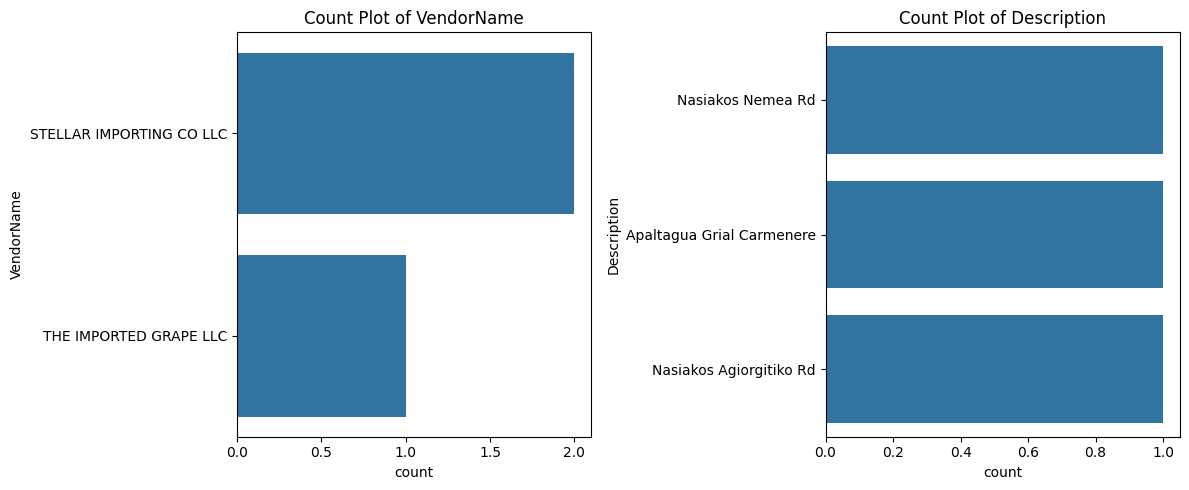

In [9]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt. figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot (1, 2, i+1)
    sb.countplot(y=df [col], order=df [col].value_counts().index [:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt. show( )

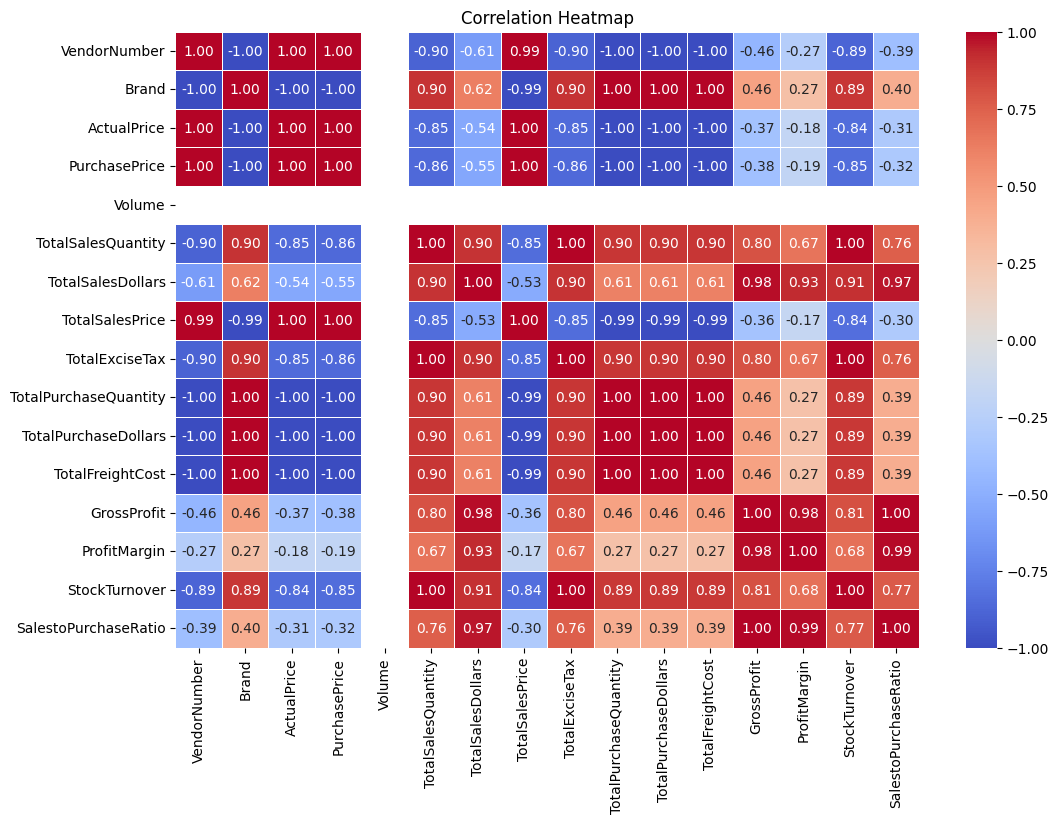

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sb.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

* PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [14]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [15]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
low_sales_threshold

np.float64(23059.51799999999)

In [17]:
high_margin_threshold

np.float64(50.40226749796898)

In [19]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance [
(brand_performance['TotalSalesDollars'] <= low_sales_threshold)&
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin


In [24]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

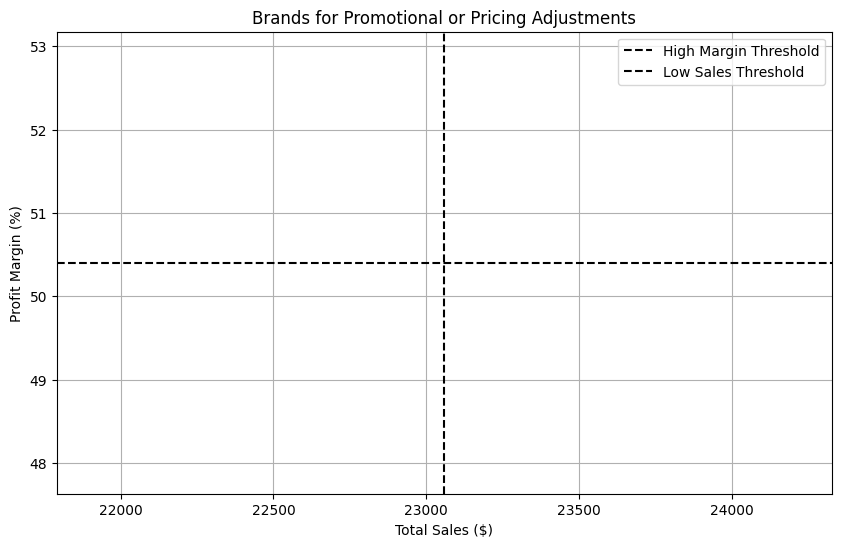

In [25]:
plt. figure(figsize=(10, 6))
sb.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sb.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold" ) 
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid (True)
plt. show()

Which vendors and brands demonstrate the highest sales performance?


In [26]:
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
STELLAR IMPORTING CO LLC    91751.04
THE IMPORTED GRAPE LLC      21147.18
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Nasiakos Nemea Rd            64229.40
Nasiakos Agiorgitiko Rd      27521.64
Apaltagua Grial Carmenere    21147.18
Name: TotalSalesDollars, dtype: float64

In [30]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

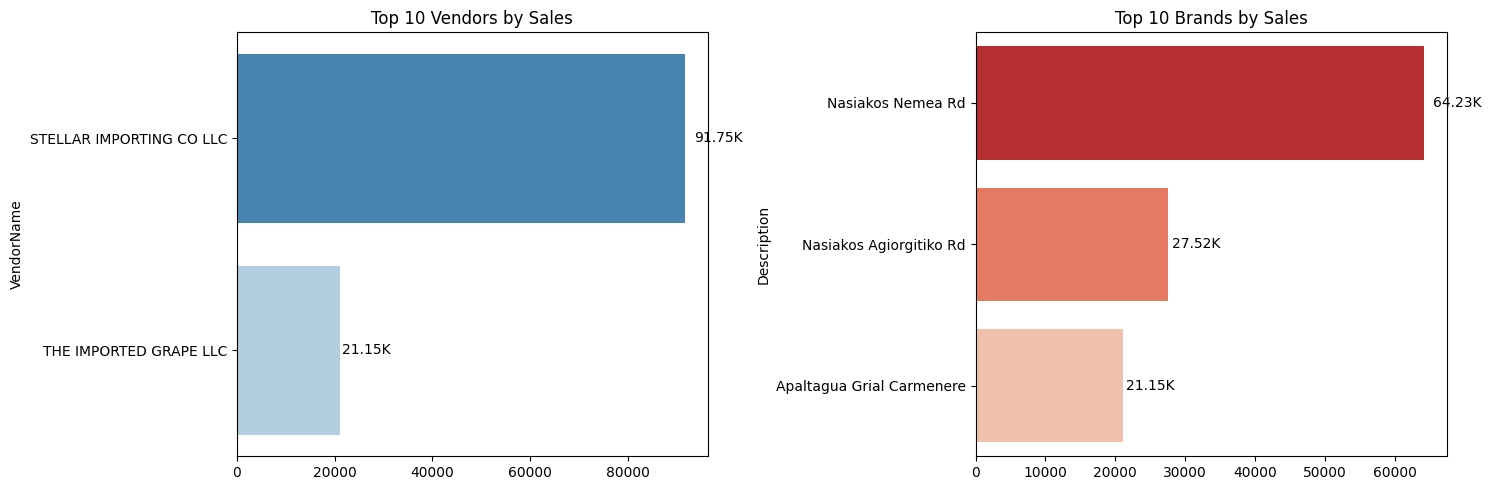

In [32]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt. subplot(1, 2, 1)
ax1 = sb.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1. text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
# Plot for Top Brands
plt. subplot(1, 2, 2)
ax2 = sb.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars (bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
plt.tight_layout ()
plt.show()

Which vendors contribute the most to total purchase dollars?

In [34]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [44]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [45]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [46]:
# Display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,STELLAR IMPORTING CO LLC,49.12K,42.63K,91.75K,75.32
1,THE IMPORTED GRAPE LLC,16.09K,5.05K,21.15K,24.68


In [47]:
top_vendors['Cummulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution%
0,STELLAR IMPORTING CO LLC,49.12K,42.63K,91.75K,75.32,75.32
1,THE IMPORTED GRAPE LLC,16.09K,5.05K,21.15K,24.68,100.00


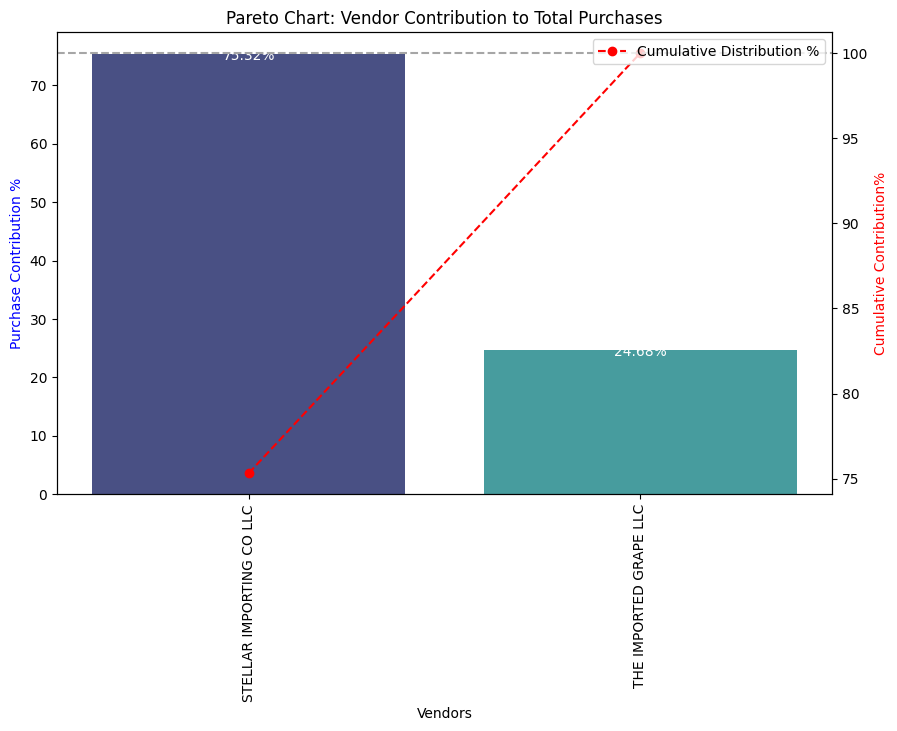

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot for Purchase Contributiong
sb.barplot(x=top_vendors ['VendorName'], y=top_vendors ['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')
# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors['Cummulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Distribution %') 

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel( 'Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend (loc='upper right')
plt.show()

How much of total procurement is dependent on the top vendors?

In [53]:
print(f"Total Pruchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum())} %")

Total Pruchase Contribution of top 10 vendors is 100 %


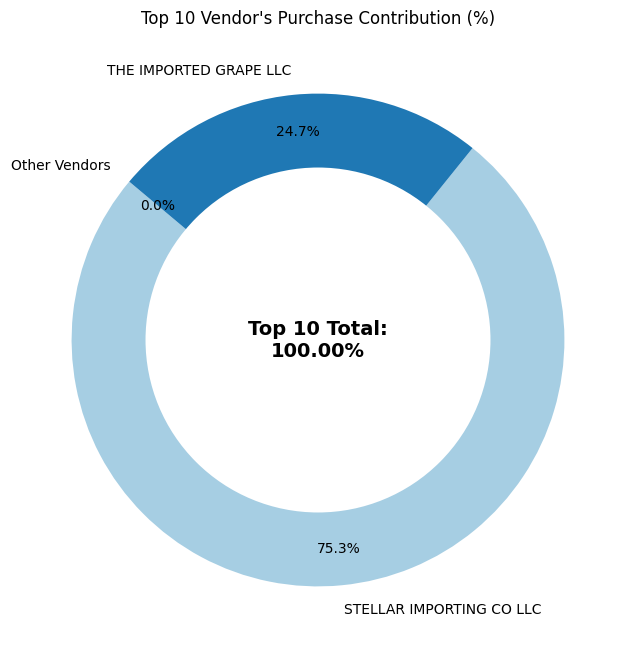

In [56]:
vendors = list(top_vendors ['VendorName'].values)
purchase_contributions = list (top_vendors ['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append ("Other Vendors")
purchase_contributions.append(remaining_contribution)
# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca() .add_artist(centre_circle)
# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center' , va='center')
plt. title("Top 10 Vendor's Purchase Contribution (%)")
plt. show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings ?

In [57]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [61]:
df["OrderSize"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"],duplicates="drop")


ValueError: Bin labels must be one fewer than the number of bin edges

In [60]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

KeyError: 'OrderSize'

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

Which vendors have low inventory turnover, indicating excess stock and slow-moving products ?

In [62]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
THE IMPORTED GRAPE LLC,0.123684
STELLAR IMPORTING CO LLC,0.788660


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [65]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 112.94K


In [67]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby ("VendorName") ["UnsoldInventoryValue"].sum().reset_index()
# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor ['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head (10)

,VendorName,UnsoldInventoryValue
1,THE IMPORTED GRAPE LLC,99.22K
0,STELLAR IMPORTING CO LLC,13.72K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [68]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)


In [72]:
top_vendors=df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [73]:
top_vendors

0    61.761935
Name: ProfitMargin, dtype: float64

In [74]:
low_vendors

1    23.896378
Name: ProfitMargin, dtype: float64

In [75]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean (data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical=stats.t.ppf((1+confidence) / 2, df=len(data) - 1)
    margin_of_error=t_critical* std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: ( nan,  nan), Mean: 61.76
Low Vendors 95% CI: ( nan, nan), Mean:  23.90


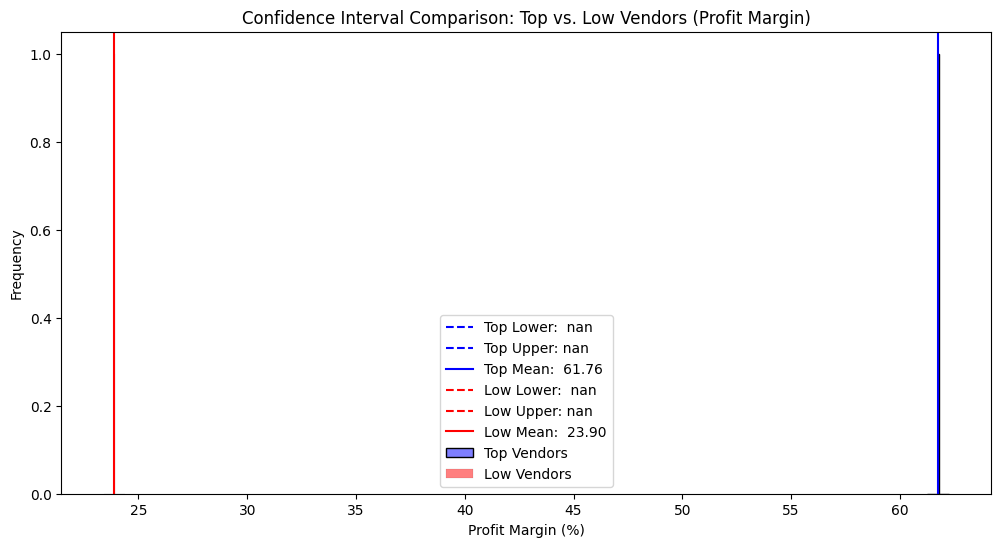

In [81]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% CI: ({top_lower: 2f}, {top_upper: .2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower: .2f}, {low_upper:.2f}), Mean: {low_mean: .2f}")
plt.figure(figsize=(12, 6))
# Top Vendors Plot
sb.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower: .2f}")
plt.axvline(top_upper, color="blue",linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean: .2f}")
# Low Vendors Plot
sb.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors") 
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower: .2f}")
plt.axvline(low_upper, color="red", linestyle="--" ,label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean: .2f}")
# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)") 
plt.xlabel("Profit Margin (%)")
plt.ylabel ("Frequency")
plt. legend ()
plt.axis(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

## Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

Hn (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"]>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]['ProfitMargin'].dropna()
# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)
# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins.")

T-Statistic: nan, P-Value: nan
Fail to Reject Ho: No significant difference in profit margins.
